### Two coupled cavities without dissipation for large hopping (J) :

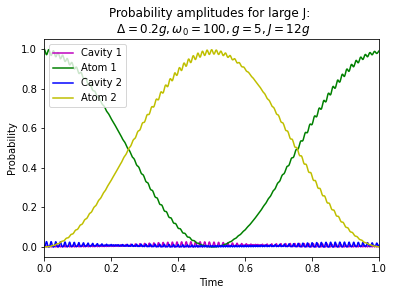

In [1]:
from qutip import tensor,qeye,destroy,basis,dag,mesolve,expect,sigmap,sigmam,identity 
from numpy import pi, linspace
from matplotlib import pyplot as plt


# Define constants:

G=5                           # Atom-cavity coupling strength
delta = 0.2*G                 # detuning between the atomic mode and the field mode
w_a = 100                     # Atom frequency 
w_f = w_a + delta             # Field frequency
J = 12*G                      # cavity-cavity hopping strength
N = 2                         # number of possible states for cavity 1

"""""
In total we have 4 Hilbert space dimensions to describe the system.
Our system composed of: Cavity1, Cavity2, Atom1, Atom2
now we should compute the operators for the full Hilbert space to use them in constructing the Hamiltonian H.
"""""



a1 = tensor([identity(2), identity(2), destroy(N), identity(N)]) # Raising operator 1
a2 = tensor([identity(2), identity(2), identity(N), destroy(N)]) # Raising operator 2


e = basis(2,0)      #Ground state
g = basis(2,1)      #Exited state

f1 = basis(N,0)
f2 = basis(N,1)


# Cavity and atomic operators in full hilbert space (Cavity1, Cavity2, Atom1, Atom2):
e1e = tensor([e*dag(e), identity(2), identity(N), identity(N)])
e2e = tensor([identity(2), e*dag(e), identity(N), identity(N)])
sp_1 = tensor([sigmap(), identity(2), identity(N), identity(N)])
sm_1 = tensor([sigmam(), identity(2), identity(N), identity(N)])
sp_2 = tensor([identity(2), sigmap(), identity(N), identity(N)])
sm_2 = tensor([identity(2), sigmam(), identity(N), identity(N)])

    
# We can write the long Hamiltonians in 4 terms:
H1 = w_a*(e1e + e2e)
H2 = w_f*(a1.dag()*a1 + a2.dag()*a2)
H3 = G*(a1*sp_1 + a1.dag() * sm_1) + G*(a2*sp_2 + a2.dag()*sm_2)
H4 = J*(a1.dag()*a2 + a1*a2.dag())
H = H1+H2+H3+H4

# Evolving the system in time:
gg_01 = tensor([g, g, f1, f2])
gg_10 = tensor([g, g, f2, f1])
eg_00 = tensor([e, g, f1, f1])
ge_00 = tensor([g, e, f1, f1])
psi_0 = eg_00                         # Initial excitation in Atom 1

# Evolve and calculate expectation values
G_C=abs(G**2/((delta+J)*(delta-J)))
T=pi/(G_C*J)

t_points = linspace(0,T,1000)
output = mesolve(H, psi_0, t_points, [], [])
  

# Plotting results:
plt.plot(t_points/T, expect(a1.dag()*a1, output.states),'m')
plt.plot(t_points/T, expect(sm_1.dag() * sm_1, output.states),'g')
plt.plot(t_points/T, expect(a2.dag()*a2, output.states),'b')
plt.plot(t_points/T, expect(sm_2.dag() * sm_2, output.states),'y')
plt.legend(("Cavity 1", "Atom 1","Cavity 2", "Atom 2"),loc='upper left')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.xlim(0,1)
plt.title('Probability amplitudes for large J: \n $\Delta=0.2g,\omega_0=100, g=5, J=12g$')
plt.show()


### Zoomed view of the field excitation probability (large hopping strength J)

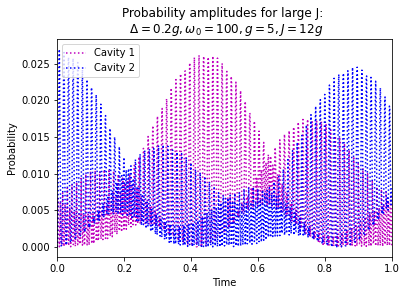

In [2]:
plt.plot(t_points/T, expect(a1.dag()*a1, output.states),'m:')
plt.plot(t_points/T, expect(a2.dag()*a2, output.states),'b:')
plt.legend(("Cavity 1", "Cavity 2"))
plt.xlabel('Time')
plt.ylabel('Probability')
plt.xlim(0,1)
plt.title('Probability amplitudes for large J: \n $\Delta=0.2g,\omega_0=100, g=5, J=12g$')
plt.show()

### Two coupled cavities without dissipation for large detuning (Delta) :

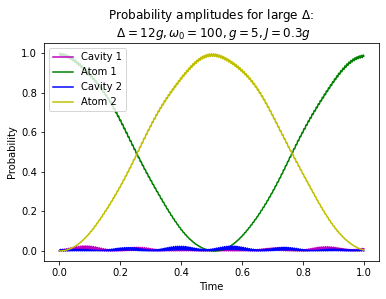

In [3]:
from qutip import tensor,qeye,destroy,basis,dag,mesolve,expect,sigmap,sigmam
from numpy import pi, linspace
from matplotlib import pyplot as plt


# Define constants:

G=5                           # Atom-cavity coupling strength
delta = 12*G                 # detuning between the atomic mode and the field mode
w_a = 100                     # Atom frequency 
w_f = w_a + delta             # Field frequency
J = 0.3*G                      # cavity-cavity hopping strength
N = 2                         # number of possible states for cavity 1

"""""
In total we have 4 Hilbert space dimensions to describe the system.
Our system composed of: Cavity1, Cavity2, Atom1, Atom2
now we should compute the operators for the full Hilbert space to use them in constructing the Hamiltonian H.
"""""


a1 = tensor([identity(2), identity(2), destroy(N), identity(N)]) # Raising operator 1
a2 = tensor([identity(2), identity(2), identity(N), destroy(N)]) # Raising operator 2


e = basis(2,0)      #Ground state
g = basis(2,1)      #Exited state

f1 = basis(N,0)
f2 = basis(N,1)


# Cavity and atomic operators in full hilbert space (Cavity1, Cavity2, Atom1, Atom2):
e1e = tensor([e*dag(e), identity(2), identity(N), identity(N)])
e2e = tensor([identity(2), e*dag(e), identity(N), identity(N)])
sp_1 = tensor([sigmap(), identity(2), identity(N), identity(N)])
sm_1 = tensor([sigmam(), identity(2), identity(N), identity(N)])
sp_2 = tensor([identity(2), sigmap(), identity(N), identity(N)])
sm_2 = tensor([identity(2), sigmam(), identity(N), identity(N)])

    
# We can write the long Hamiltonians in 4 terms:
H1 = w_a*(e1e + e2e)
H2 = w_f*(a1.dag()*a1 + a2.dag()*a2)
H3 = G*(a1*sp_1 + a1.dag() * sm_1) + G*(a2*sp_2 + a2.dag()*sm_2)
H4 = J*(a1.dag()*a2 + a1*a2.dag())
H = H1+H2+H3+H4

# Evolving the system in time:
gg_01 = tensor([g, g, f1, f2])
gg_10 = tensor([g, g, f2, f1])
eg_00 = tensor([e, g, f1, f1])
ge_00 = tensor([g, e, f1, f1])
psi_0 = eg_00                         # Initial excitation in Atom 1


T= pi*(delta**2)/((G**2)*(J))


t_points = linspace(0,T,1000)
output = mesolve(H, psi_0, t_points, [], [])
  

# Plotting results:
plt.plot(t_points/T, expect(a1.dag()*a1, output.states),'m')
plt.plot(t_points/T, expect(sm_1.dag() * sm_1, output.states),'g')
plt.plot(t_points/T, expect(a2.dag()*a2, output.states),'b')
plt.plot(t_points/T, expect(sm_2.dag() * sm_2, output.states),'y')
plt.legend(("Cavity 1", "Atom 1","Cavity 2", "Atom 2"),loc='upper left')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Probability amplitudes for large $\Delta$: \n $\Delta=12g,\omega_0=100, g=5, J=0.3g$')
plt.show()


### Zoomed view of the field excitation probability (large detuning)

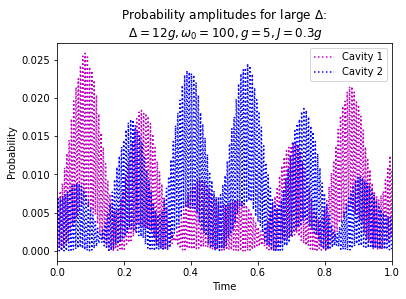

In [4]:
plt.plot(t_points/T, expect(a1.dag()*a1, output.states),'m:')
plt.plot(t_points/T, expect(a2.dag()*a2, output.states),'b:')
plt.legend(("Cavity 1", "Cavity 2"))
plt.xlabel('Time')
plt.ylabel('Probability')
plt.xlim(0,1)
plt.title('Probability amplitudes for large $\Delta$: \n $\Delta=12g,\omega_0=100, g=5, J=0.3g$')
plt.show()

### Two coupled cavities resonance caase (J=Delta) :

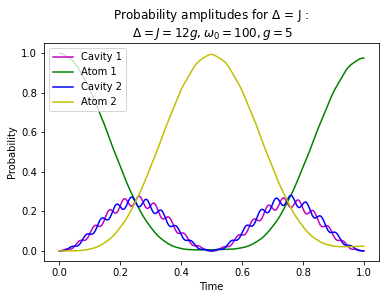

In [6]:
from qutip import tensor,qeye,destroy,basis,dag,mesolve,expect,sigmap,sigmam,identity
from numpy import pi, linspace
from matplotlib import pyplot as plt


# Define constants:

G=5                           # Atom-cavity coupling strength
delta = 10*G                 # detuning between the atomic mode and the field mode
w_a = 100                     # Atom frequency 
w_f = w_a + delta             # Field frequency
J = 10*G                      # cavity-cavity hopping strength
N = 2                         # number of possible states for cavity 1

"""""
In total we have 4 Hilbert space dimensions to describe the system.
Our system composed of: Cavity1, Cavity2, Atom1, Atom2
now we should compute the operators for the full Hilbert space to use them in constructing the Hamiltonian H.
"""""


a1 = tensor([identity(2), identity(2), destroy(N), identity(N)]) # Raising operator 1
a2 = tensor([identity(2), identity(2), identity(N), destroy(N)]) # Raising operator 2


e = basis(2,0)      #Ground state
g = basis(2,1)      #Exited state

f1 = basis(N,0)
f2 = basis(N,1)

# Cavity and atomic operators in full hilbert space (Cavity1, Cavity2, Atom1, Atom2):
e1e = tensor([e*dag(e), identity(2), identity(N), identity(N)])
e2e = tensor([identity(2), e*dag(e), identity(N), identity(N)])
sp_1 = tensor([sigmap(), identity(2), identity(N), identity(N)])
sm_1 = tensor([sigmam(), identity(2), identity(N), identity(N)])
sp_2 = tensor([identity(2), sigmap(), identity(N), identity(N)])
sm_2 = tensor([identity(2), sigmam(), identity(N), identity(N)])

    
# We can write the long Hamiltonians in 4 terms:
H1 = w_a*(e1e + e2e)
H2 = w_f*(a1.dag()*a1 + a2.dag()*a2)
H3 = G*(a1*sp_1 + a1.dag() * sm_1) + G*(a2*sp_2 + a2.dag()*sm_2)
H4 = J*(a1.dag()*a2 + a1*a2.dag())
H = H1+H2+H3+H4

# Evolving the system in time:
gg_01 = tensor([g, g, f1, f2])
gg_10 = tensor([g, g, f2, f1])
eg_00 = tensor([e, g, f1, f1])
ge_00 = tensor([g, e, f1, f1])
psi_0 = eg_00                         # Initial excitation in Atom 1


T= 2*pi/G


t_points = linspace(0,T,1000)
output = mesolve(H, psi_0, t_points, [], [])
  

# Plotting results:
plt.plot(t_points/T, expect(a1.dag()*a1, output.states),'m')
plt.plot(t_points/T, expect(sm_1.dag() * sm_1, output.states),'g')
plt.plot(t_points/T, expect(a2.dag()*a2, output.states),'b')
plt.plot(t_points/T, expect(sm_2.dag() * sm_2, output.states),'y')
plt.legend(("Cavity 1", "Atom 1","Cavity 2", "Atom 2"),loc='upper left')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Probability amplitudes for $\Delta$ = J : \n $\Delta=J=12g,\omega_0=100, g=5$')
plt.show()
